In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"D:\Dig\Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [4]:
dates=[]
prices=[]

In [5]:
data.shape

(1258, 6)

In [6]:
#Get all the rows from the Date column
df_dates=data.loc[:,"Date"]
#Get all the rows from the Open Column
df_opens=data.loc[:,"Open"]

In [7]:
#Create independent dataset of X
for date in df_dates:
    dates.append([int(date.split('/')[1])])
#Create dependent data set of y
for open_price in df_opens:
    prices.append(float(open_price))

In [8]:
#see what dates are recorded 
dates[0:10]

[[3], [4], [5], [6], [9], [10], [11], [12], [13], [17]]

In [12]:
def predict_price(dates,prices,x):
    
    #create 3 support vector regression model
    svr_lin=SVR(kernel="linear",C=1e3)
    svr_poly=SVR(kernel="poly",C=1e3,degree=2)
    svr_rbf=SVR(kernel="rbf",C=1e3,gamma='auto')
    
    #Train the SVR model
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    #create the Linear Regression model
    lin_reg=LinearRegression()
    #Train the Linear Regression model
    lin_reg.fit(dates,prices)
    
    #plot the models on graph to see which has the best fit
    plt.scatter(dates,prices,color='black',label='Date')
    plt.plot(dates,svr_lin.predict(dates),color='green',label='SVR_LINEAR')
    plt.plot(dates,svr_poly.predict(dates),color='blue',label='SVR_POLY')
    plt.plot(dates,svr_rbf.predict(dates),color='red',label='SVR_RBF')
    plt.plot(dates,lin_reg.predict(dates),color='yellow',label='SVR_REG')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


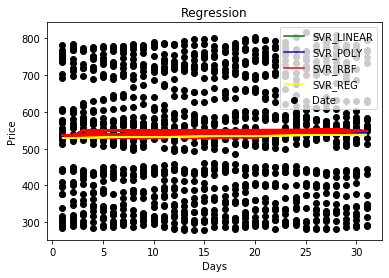

(553.1896788974475, 541.1716666534081, 543.832858544421, 537.2811420811632)


In [13]:
#Predict the proce of GOOG on day 28
predict_pr = predict_price(dates,prices,[[28]])
print(predict_pr)